# Proyecto de Mineria de Datos #
## CodelCOVID-19##
### Analisis exploratorio de datos###

En este documento se realizara el analisis exploratorio de datos de dos tipos de dataset:
* Dataset de el valor de criptomoneda por fecha
* Dataset de cantidad de contagiados por dia de diferentes paises del mundo ordenados alfabeticamente

In [1]:
import pandas as pd
df= pd.read_csv("dataset_btc.csv")
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-07-13,9277.20,9306.40,9224.29,9243.61,17519821266,170379677119
1,2020-07-12,9241.06,9319.42,9197.45,9276.50,14452361907,170977422928
2,2020-07-11,9277.51,9293.53,9199.49,9240.35,13249910444,170302234778
3,2020-07-10,9273.36,9287.47,9118.00,9278.81,16860035605,171001933827
4,2020-07-09,9427.99,9431.38,9235.00,9277.97,18000702524,170977231638
...,...,...,...,...,...,...,...
190,2020-01-05,7410.45,7544.50,7400.54,7411.32,19725074095,134469548249
191,2020-01-04,7345.38,7427.39,7309.51,7410.66,18444271275,134442464030
192,2020-01-03,6984.43,7413.72,6915.00,7344.88,28111481032,133233444755
193,2020-01-02,7202.55,7212.16,6935.27,6985.47,20802083465,126699395235


In [14]:
df2=pd.read_csv("dataset_eth.csv")
df2.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-07-14,239.98,242.00,237.80,240.21,7357458555,26846147251
1,2020-07-13,242.18,244.31,238.23,239.60,7787751468,26775071858
2,2020-07-12,239.46,243.31,237.77,242.13,6596394718,27054158346
3,2020-07-11,241.04,241.53,238.33,239.46,5643067316,26752161985
4,2020-07-10,242.87,242.88,236.73,240.98,7281370522,26919422187


In [19]:
data_covid=pd.read_csv("covid.csv")
data_covid=data_covid.groupby(["countriesAndTerritories"])
data_covid.head(1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14-07-2020,14,7,2020,4,2,Afghanistan,AF,AFG,38041757,Asia,8.456497
187,14-07-2020,14,7,2020,117,2,Albania,AL,ALB,2862427,Europe,38.603605
315,14-07-2020,14,7,2020,494,7,Algeria,DZ,DZA,43053054,Africa,14.210374
507,14-07-2020,14,7,2020,3,0,Andorra,AD,AND,76177,Europe,3.938197


In [38]:
data_covid=pd.read_csv("covid.csv")
fecha=pd.to_datetime(data_covid["dateRep"])

datetime_index = pd.DatetimeIndex(fecha.values) 
data_covid = data_covid.set_index(datetime_index)
data_covid = data_covid.drop(columns=["dateRep"])
#data_covid["dateRep"]=fecha
#data_covid.dtypes
data_covid

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2020-07-14,14,7,2020,4,2,Afghanistan,AF,AFG,38041757,Asia,8.456497
2020-07-13,13,7,2020,0,0,Afghanistan,AF,AFG,38041757,Asia,9.158357
2020-12-07,12,7,2020,85,16,Afghanistan,AF,AFG,38041757,Asia,10.081028
2020-11-07,11,7,2020,458,37,Afghanistan,AF,AFG,38041757,Asia,10.291323
2020-10-07,10,7,2020,255,20,Afghanistan,AF,AFG,38041757,Asia,9.812901
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,18,3,2020,0,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-17,17,3,2020,9,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-16,16,3,2020,3,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-14,14,3,2020,1,0,Andorra,AD,AND,76177,Europe,NaN


## 3 - Graficos de contagios ##
### 3.1 - Por Pais ###

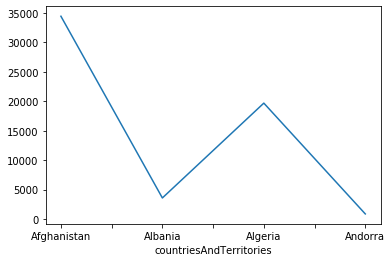

In [18]:
import seaborn as sns
#import matplotlib.pyplot as plt

data_pais=data_covid[["countriesAndTerritories","cases"]]
#grouped=data_pais.groupby(["countriesAndTerritories"])
#grouped.plot("dateRep",subplots=True,layout=(4,4),figsize=(20,10))
#data_pais['2020-04-01':'2020-04-05']
#grouped.resample('W').plot(figsize=(20,10))
data_pais
grouped=data_pais.groupby("countriesAndTerritories")["cases"].sum()
#grouped.get_group("Albania")
#grouped=data_pais.groupby(["countriesAndTerritories"])
grouped.plot()

### 3.2 - Por Continente ###

In [51]:
data_covid=pd.read_csv("covid.csv")

#Se genera la fecha en el formato de datetime
fecha=pd.to_datetime(data_covid["dateRep"],format="%d-%m-%Y")
#Se transforma a indice de tiempo los valores generados anteriormente
datetime_index = pd.DatetimeIndex(fecha.values) 
#Se setea como indice datetime_index
data_covid = data_covid.set_index(datetime_index)
#data_covid = data_covid.drop(columns=["dateRep"])
data_covid=data_covid.pivot(columns="countriesAndTerritories",values="cases").fillna(0)
data_covid

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra
2019-12-31,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-07-10,255.0,82.0,460.0,0.0
2020-07-11,458.0,90.0,0.0,0.0
2020-07-12,85.0,93.0,904.0,0.0
2020-07-13,0.0,83.0,483.0,0.0
